In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_path = '../data/processed_data.csv'
df = pd.read_csv(data_path)

In [204]:
# Plotting functions: 
def plot_histogram(data, bins=10, xlabel=None, ylabel=None, title=None):
    """
    Plot a histogram of the given data.
    
    Parameters:
        data (array-like): The data to plot.
        bins (int or sequence, optional): The number of bins or bin edges. Default is 10.
        xlabel (str, optional): The label for the x-axis. Default is None.
        ylabel (str, optional): The label for the y-axis. Default is None.
        title (str, optional): The title of the plot. Default is None.
    """
    plt.hist(data, bins=bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


In [206]:
numerical_summary = df.describe().T.round(2)
categorical_summary = df.describe(include='object').T

print("Summary statistics for numerical columns: ")
display(numerical_summary)
print("Summary statistics for categorical columns: ")
display(categorical_summary)

Summary statistics for numerical columns: 


,count,mean,std,min,25%,50%,75%,max
Quantity,401604.0,12.18,250.28,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,401604.0,3.47,69.76,0.0,1.25,1.95,3.75,38970.0
CustomerID,401604.0,15281.16,1714.01,12346.0,13939.00,15145.00,16784.00,18287.0
TotalPrice,401604.0,20.61,430.35,-168469.6,4.25,11.70,19.80,168469.6


Summary statistics for categorical columns: 


,count,unique,top,freq
InvoiceNo,401604,22190,576339,542
StockCode,401604,3684,85123A,2065
Description,401604,3896,WHITE HANGING HEART T-LIGHT HOLDER,2058
InvoiceDate,401604,20460,2011-11-14 15:27:00,543
Country,401604,37,United Kingdom,356728


#### Cancelled Orders (Invoice Number column)

In [207]:
# Unique Order count:
orders = df['InvoiceNo'].nunique()
print(f'Number of Unique Orders: {orders}')

# Get Cancelled orders: invoice numbers that start with 'C'
cancels = df[df['InvoiceNo'].str.startswith('C')]
print(f'Number of cancelled transactions: {cancels.shape[0]}')
print(f'Percentage of cancelled transactions: {cancels.shape[0] / len(df) * 100:.2f}%')

Number of Unique Orders: 22190
Number of cancelled transactions: 8872
Percentage of cancelled transactions: 2.21%


In [208]:
# Summary statistics for cancelled orders:
cancels.describe().drop(['CustomerID'], axis=1).round(2)

,Quantity,UnitPrice,TotalPrice
count,8872.00,8872.00,8872.00
mean,-30.77,18.90,-68.61
std,1172.25,445.19,2022.87
min,-80995.00,0.01,-168469.60
25%,-6.00,1.45,-17.00
50%,-2.00,2.95,-8.50
75%,-1.00,4.95,-3.30
max,-1.00,38970.00,-0.12


#### Stock code:

----------------------------- STOCK CODE -----------------------------
Number of unique stock codes: 3684 

---------------------- STOCK CODE DISTRIBUTION -----------------------
Top 10 stock codes as a percentage of total transactions: 


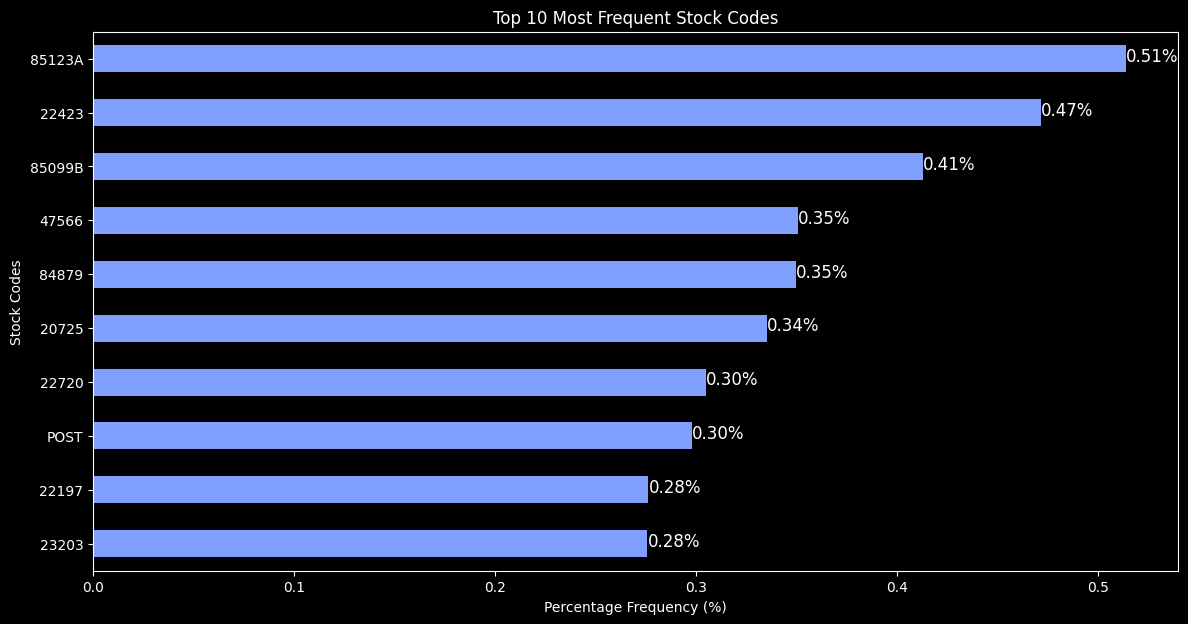

In [209]:
# Number of unique stock code: 
unique_stock_codes = df['StockCode'].unique()
nunique_code =  df['StockCode'].nunique()
print(" STOCK CODE ".center(70,'-'))
print(f'Number of unique stock codes: {nunique_code} \n')

# Plot the distribution of stock code occurrences in sales:
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).sort_values(ascending=False).head(10) * 100
print(" STOCK CODE DISTRIBUTION ".center(70,'-'))
print(f'Top 10 stock codes as a percentage of total transactions: ')

plt.figure(figsize=(14, 7))
top_10_stock_codes.plot(kind='barh', color='#809fff')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.05, f'{value:.2f}%', fontsize=12)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()


In [210]:
print(" ANOMALIES IN STOCK CODE ".center(70,'-'))
num_char_counts_stockcode = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()
print('Numerical character counts in stock codes and their occurrences:')
print(num_char_counts_stockcode)

print('Stock codes that contain 0 or 1 numerical character:')
abnormal_stock_code = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]
print(abnormal_stock_code)

# Drop the abnormal stock codes:
df = df[~df['StockCode'].isin(abnormal_stock_code)]

---------------------- ANOMALIES IN STOCK CODE -----------------------
Numerical character counts in stock codes and their occurrences:
5    3676
0       7
1       1
Name: count, dtype: int64
Stock codes that contain 0 or 1 numerical character:
['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK']


#### Description

--------- DESCRIPTION - MOST TRANSACTED PRODUCT DESCRIPTION ----------


Description
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG RED RETROSPOT               1345
SET OF 3 CAKE TINS PANTRY DESIGN      1224
LUNCH BAG  BLACK SKULL.               1099
PACK OF 72 RETROSPOT CAKE CASES       1062
SPOTTY BUNTING                        1026
Name: count, dtype: int64

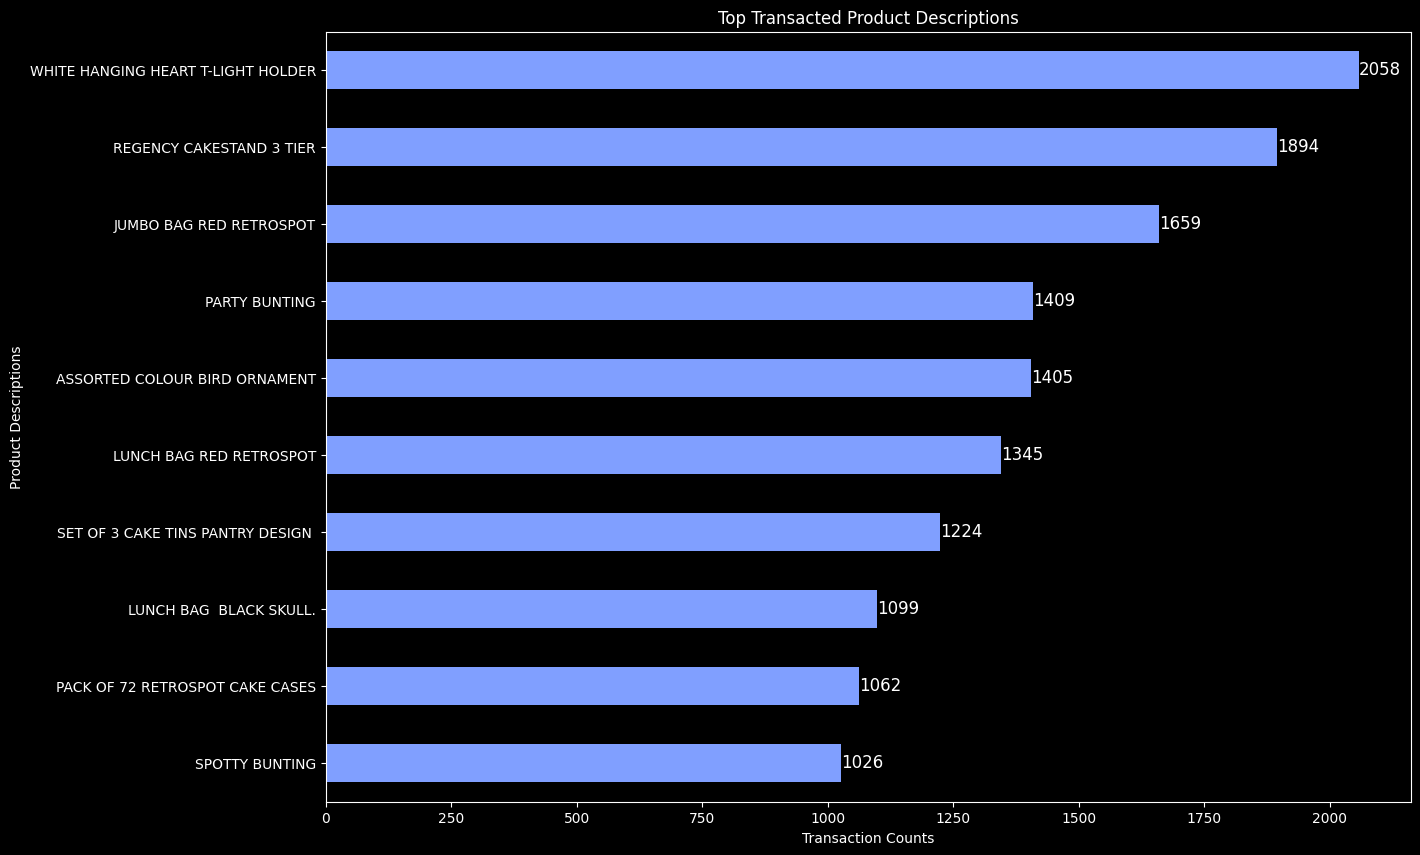

In [211]:
print(" DESCRIPTION - MOST TRANSACTED PRODUCT DESCRIPTION ".center(70,'-'))
description_counts = df['Description'].value_counts().head(10)
display(description_counts.head(10))

plt.figure(figsize=(14, 10))
description_counts.plot(kind='barh', color='#809fff')
for index, value in enumerate(description_counts):
    plt.text(value, index+0.05, f'{value}', fontsize=12)

plt.title('Top Transacted Product Descriptions')
plt.xlabel('Transaction Counts')
plt.ylabel('Product Descriptions')
plt.gca().invert_yaxis()
plt.show()

In [212]:
print(" ANOMALIES IN DESCRIPTION ".center(70,'-'))
lwc_description = df['Description'].unique()
lwc_description = [d for d in lwc_description if any(c.islower() for c in d)]
print('Number of descriptions with lowercase characters: ', len(lwc_description))
display(lwc_description)

# Remove non-product descriptions: 
non_prod_desc = ['Next Day Carriage', 'High Resolution Image']
df = df[~df['Description'].isin(non_prod_desc)]

# Uppercase other descriptions with some lowercase characters:
df['Description'] = df['Description'].str.upper()

---------------------- ANOMALIES IN DESCRIPTION ----------------------
Number of descriptions with lowercase characters:  19


['BAG 500g SWIRLY MARBLES',
 'POLYESTER FILLER PAD 45x45cm',
 'POLYESTER FILLER PAD 45x30cm',
 'POLYESTER FILLER PAD 40x40cm',
 'FRENCH BLUE METAL DOOR SIGN No',
 'BAG 250g SWIRLY MARBLES',
 'BAG 125g SWIRLY MARBLES',
 '3 TRADITIONAl BISCUIT CUTTERS  SET',
 'NUMBER TILE COTTAGE GARDEN No',
 'FOLK ART GREETING CARD,pack/12',
 'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
 'POLYESTER FILLER PAD 65CMx65CM',
 'NUMBER TILE VINTAGE FONT No ',
 'POLYESTER FILLER PAD 30CMx30CM',
 'POLYESTER FILLER PAD 60x40cm',
 'FLOWERS HANDBAG blue and orange',
 'Next Day Carriage',
 'THE KING GIFT BAG 25x24x12cm',
 'High Resolution Image']

#### Unit Price

In [213]:
print(" UNIT PRICE STATISTICS SUMMARY ".center(70,'-'))
display(df['UnitPrice'].describe().round(2))

print(" ANOMALIES IN UNIT PRICE ".center(70,'-'))
df[df['UnitPrice'] == 0].describe().round(2)[['Quantity']]

------------------- UNIT PRICE STATISTICS SUMMARY --------------------


count    399606.00
mean          2.90
std           4.45
min           0.00
25%           1.25
50%           1.95
75%           3.75
max         649.50
Name: UnitPrice, dtype: float64

---------------------- ANOMALIES IN UNIT PRICE -----------------------


,Quantity
count,33.00
mean,420.52
std,2176.71
min,1.00
25%,2.00
50%,11.00
75%,36.00
max,12540.00


In [214]:
# Remove rows with UnitPrice = 0
df = df[df['UnitPrice'] > 0]
df.reset_index(drop=True, inplace=True)

In [215]:
# Save cleaned data for next step, feature engineering: 
df.to_csv('../data/cleaned_data.csv', index=False)

In [216]:
# Total quantity per order: 
total_quantity = df.groupby('InvoiceNo')['Quantity'].sum()
total_quantity.sort_values(ascending=False).head(5)

InvoiceNo
581483    80995
541431    74215
556917    15049
563076    14730
572035    13392
Name: Quantity, dtype: int64

### Basic Data Exploration 
- **Unique Order, Cancelled Order**: There are 22190 unique orders from counting the unique InvoiceNo value. There are 3654 cancelled orders, which accounts for  (cancelled orders has InvoiceNo starts with letter 'C').
- **Order Value Distribution**: 